# Performance of  various companies across Different sectors

## Meet our Team
* Snigdha Chigurupati
* Akshitha Kukudala
* Arushi Agarwal

## PART A

## Aim :
To find the best stock in each industry through CAPM analysis and build the best portfolio

##  Implementation:

1. Import the required libraries, and download the data related to pharma stocks from yfinance for the period 2020-2022
2. Understanding the data and calculating the return percentage
3. Calculating the risk free rate and excess return of each stock in each sector/industry
4. Building the CAPM model for each stock and analyzing the results
5. Calculating the Sharpe and Treynor ratio to find the best investments across different industries
6. Building the best portfolio using EfficientFrontier

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

### Pharmaceuticals

In [2]:
stocks = ['JNJ', 'MRK','MRNA','^GSPC']
start = dt.datetime(2020,1,1)
end = dt.datetime(2022,1,1)
stock_data = yf.download(stocks, start= start, end=end, interval='1d', ignore_tz= True)['Close']

[*********************100%***********************]  4 of 4 completed


In [3]:
stock_data.head()

,JNJ,MRK,MRNA,^GSPC
Date,,,,
2020-01-02,145.970001,87.824425,19.230000,3257.850098
2020-01-03,144.279999,87.070610,18.889999,3234.850098
2020-01-06,144.100006,87.442749,18.129999,3246.280029
2020-01-07,144.979996,85.114502,17.780001,3237.179932
2020-01-08,144.960007,84.541985,17.980000,3253.050049


In [4]:
stock_data.rename(columns= {"^GSPC":"GSPC"}, inplace= True)
stock_data.head()

,JNJ,MRK,MRNA,GSPC
Date,,,,
2020-01-02,145.970001,87.824425,19.230000,3257.850098
2020-01-03,144.279999,87.070610,18.889999,3234.850098
2020-01-06,144.100006,87.442749,18.129999,3246.280029
2020-01-07,144.979996,85.114502,17.780001,3237.179932
2020-01-08,144.960007,84.541985,17.980000,3253.050049


In [5]:
returns = stock_data.pct_change().dropna()
returns

,JNJ,MRK,MRNA,GSPC
Date,,,,
2020-01-03,-0.011578,-0.008583,-0.017681,-0.007060
2020-01-06,-0.001248,0.004274,-0.040233,0.003533
2020-01-07,0.006107,-0.026626,-0.019305,-0.002803
2020-01-08,-0.000138,-0.006726,0.011249,0.004902
2020-01-09,0.002966,0.008804,0.023359,0.006655
...,...,...,...,...
2021-12-27,0.008440,0.011092,-0.012440,0.013839
2021-12-28,0.004008,0.003134,-0.022035,-0.001010
2021-12-29,0.007044,0.001823,0.026673,0.001402


In [6]:
returns.corr()

,JNJ,MRK,MRNA,GSPC
JNJ,1.000000,0.618027,0.070520,0.701066
MRK,0.618027,1.000000,0.012659,0.591354
MRNA,0.070520,0.012659,1.000000,0.012126
GSPC,0.701066,0.591354,0.012126,1.000000


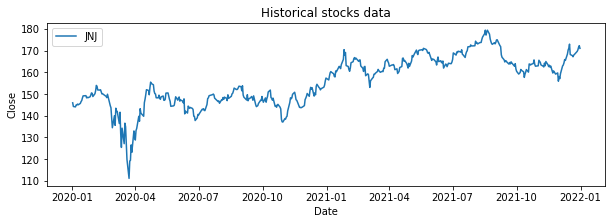

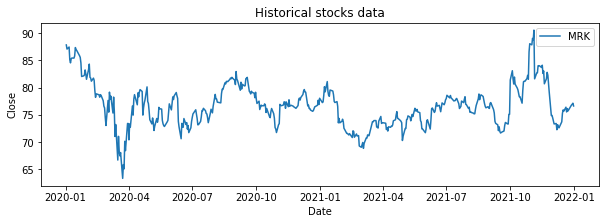

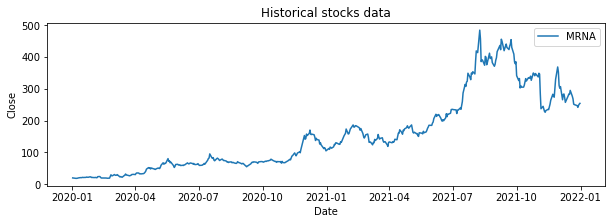

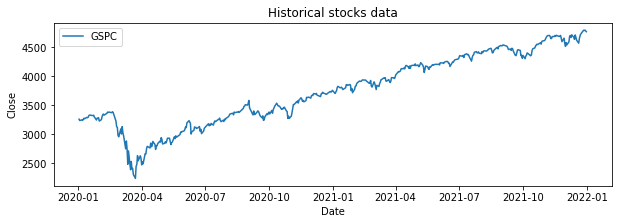

In [8]:
for stock in stock_data.columns:
    plt.figure(figsize=(10, 3))
    plt.plot(stock_data.index, stock_data[stock], label=stock)
    plt.title('Historical stocks data')
    plt.xlabel('Date')
    plt.ylabel('Close')
    plt.legend()
    plt.show()

In [9]:
from fredapi import Fred
fred = Fred(api_key='4110d4842dee8dde81860b4b76815d14')

In [10]:
fred.search("risk free")

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
DGS10,DGS10,2023-04-05,2023-04-05,Market Yield on U.S. Treasury Securities at 10...,1962-01-02,2023-04-03,Daily,D,Percent,%,Not Seasonally Adjusted,NSA,2023-04-04 15:20:03-05:00,92,For further information regarding treasury con...
GS10,GS10,2023-04-05,2023-04-05,Market Yield on U.S. Treasury Securities at 10...,1953-04-01,2023-03-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-04-03 15:17:07-05:00,72,Averages of business days. For further informa...
WGS10YR,WGS10YR,2023-04-05,2023-04-05,Market Yield on U.S. Treasury Securities at 10...,1962-01-05,2023-03-31,"Weekly, Ending Friday",W,Percent,%,Not Seasonally Adjusted,NSA,2023-04-03 15:22:05-05:00,56,Averages of business days. For further informa...
DGS2,DGS2,2023-04-05,2023-04-05,Market Yield on U.S. Treasury Securities at 2-...,1976-06-01,2023-04-03,Daily,D,Percent,%,Not Seasonally Adjusted,NSA,2023-04-04 15:20:09-05:00,82,For further information regarding treasury con...
GS2,GS2,2023-04-05,2023-04-05,Market Yield on U.S. Treasury Securities at 2-...,1976-06-01,2023-03-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-04-03 15:17:16-05:00,47,Averages of business days. For further informa...
DGS1,DGS1,2023-04-05,2023-04-05,Market Yield on U.S. Treasury Securities at 1-...,1962-01-02,2023-04-03,Daily,D,Percent,%,Not Seasonally Adjusted,NSA,2023-04-04 15:20:09-05:00,80,For further information regarding treasury con...
WGS2YR,WGS2YR,2023-04-05,2023-04-05,Market Yield on U.S. Treasury Securities at 2-...,1976-06-04,2023-03-31,"Weekly, Ending Friday",W,Percent,%,Not Seasonally Adjusted,NSA,2023-04-03 15:22:10-05:00,37,Averages of business days. For further informa...
DGS5,DGS5,2023-04-05,2023-04-05,Market Yield on U.S. Treasury Securities at 5-...,1962-01-02,2023-04-03,Daily,D,Percent,%,Not Seasonally Adjusted,NSA,2023-04-04 15:20:10-05:00,79,For further information regarding treasury con...
WGS1YR,WGS1YR,2023-04-05,2023-04-05,Market Yield on U.S. Treasury Securities at 1-...,1962-01-05,2023-03-31,"Weekly, Ending Friday",W,Percent,%,Not Seasonally Adjusted,NSA,2023-04-03 15:22:06-05:00,56,Averages of business days. For further informa...


In [11]:
risk_free = fred.get_series('DGS2')['2020-01-01':'2022-01-01']
risk_free = (risk_free/(2*365)).dropna()
risk_free

2020-01-02    0.002164
2020-01-03    0.002096
2020-01-06    0.002110
2020-01-07    0.002110
2020-01-08    0.002164
                ...   
2021-12-27    0.001041
2021-12-28    0.001014
2021-12-29    0.001027
2021-12-30    0.001000
2021-12-31    0.001000
Length: 502, dtype: float64

In [12]:
returns = pd.merge(returns, pd.DataFrame(risk_free, columns=['risk_free']), left_index=True, right_index=True)
returns

,JNJ,MRK,MRNA,GSPC,risk_free
2020-01-03,-0.011578,-0.008583,-0.017681,-0.007060,0.002096
2020-01-06,-0.001248,0.004274,-0.040233,0.003533,0.002110
2020-01-07,0.006107,-0.026626,-0.019305,-0.002803,0.002110
2020-01-08,-0.000138,-0.006726,0.011249,0.004902,0.002164
2020-01-09,0.002966,0.008804,0.023359,0.006655,0.002164
...,...,...,...,...,...
2021-12-27,0.008440,0.011092,-0.012440,0.013839,0.001041
2021-12-28,0.004008,0.003134,-0.022035,-0.001010,0.001014
2021-12-29,0.007044,0.001823,0.026673,0.001402,0.001027
2021-12-30,0.004430,0.002469,0.015007,-0.002990,0.001000


In [13]:
stocks = returns.drop(columns=['risk_free'])
stocks = stocks.columns
stocks

Index(['JNJ', 'MRK', 'MRNA', 'GSPC'], dtype='object')

In [14]:
for i in stocks:
    returns[f'excess_return_{i}'] = returns[i] - risk_free
returns

,JNJ,MRK,MRNA,GSPC,risk_free,excess_return_JNJ,excess_return_MRK,excess_return_MRNA,excess_return_GSPC
2020-01-03,-0.011578,-0.008583,-0.017681,-0.007060,0.002096,-0.013674,-0.010679,-0.019777,-0.009156
2020-01-06,-0.001248,0.004274,-0.040233,0.003533,0.002110,-0.003357,0.002164,-0.042343,0.001424
2020-01-07,0.006107,-0.026626,-0.019305,-0.002803,0.002110,0.003997,-0.028736,-0.021415,-0.004913
2020-01-08,-0.000138,-0.006726,0.011249,0.004902,0.002164,-0.002302,-0.008891,0.009084,0.002738
2020-01-09,0.002966,0.008804,0.023359,0.006655,0.002164,0.000802,0.006639,0.021195,0.004491
...,...,...,...,...,...,...,...,...,...
2021-12-27,0.008440,0.011092,-0.012440,0.013839,0.001041,0.007399,0.010051,-0.013482,0.012798
2021-12-28,0.004008,0.003134,-0.022035,-0.001010,0.001014,0.002994,0.002121,-0.023049,-0.002024
2021-12-29,0.007044,0.001823,0.026673,0.001402,0.001027,0.006017,0.000795,0.025646,0.000374
2021-12-30,0.004430,0.002469,0.015007,-0.002990,0.001000,0.003430,0.001469,0.014007,-0.003990


In [15]:
returns.isnull().sum()

JNJ                   0
MRK                   0
MRNA                  0
GSPC                  0
risk_free             0
excess_return_JNJ     0
excess_return_MRK     0
excess_return_MRNA    0
excess_return_GSPC    0
dtype: int64

In [16]:
X = returns['excess_return_GSPC']
X = sm.add_constant(X, prepend=False)

C:\Users\snigdha.chigurupati\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [17]:
y_JNJ = returns['excess_return_JNJ']
capm_model_JNJ = sm.OLS(y_JNJ, X)
capm_JNJ = capm_model_JNJ.fit()
capm_JNJ.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      excess_return_JNJ   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     484.9
Date:                Wed, 05 Apr 2023   Prob (F-statistic):           1.51e-75
Time:                        10:45:12   Log-Likelihood:                 1557.8
No. Observations:                 500   AIC:                            -3112.
Df Residuals:                     498   BIC:                            -3103.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
excess_return_GSPC     0.6429      0.029     22.021      0.000       0.586       0.700
const                 -0.0003      0.000     -0.550      0.583      -0.001       0.001
==============================================================================
Omnibus:                       64.866   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              513.628
Skew:                          -0.176   Prob(JB):                    2.93e-112
Kurtosis:                       7.953   Cond. No.                         60.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
y_MRK = returns['excess_return_MRK']
capm_model_MRK = sm.OLS(y_MRK, X)
capm_MRK = capm_model_MRK.fit()
capm_MRK.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      excess_return_MRK   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     270.3
Date:                Wed, 05 Apr 2023   Prob (F-statistic):           7.73e-49
Time:                        10:45:12   Log-Likelihood:                 1415.8
No. Observations:                 500   AIC:                            -2828.
Df Residuals:                     498   BIC:                            -2819.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
excess_return_GSPC     0.6377      0.039     16.441      0.000       0.561       0.714
const                 -0.0008      0.001     -1.265      0.206      -0.002       0.000
==============================================================================
Omnibus:                       96.733   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1158.932
Skew:                          -0.417   Prob(JB):                    2.19e-252
Kurtosis:                      10.412   Cond. No.                         60.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
y_MRNA = returns['excess_return_MRNA']
capm_model_MRNA = sm.OLS(y_MRNA, X)
capm_MRNA = capm_model_MRNA.fit()
capm_MRNA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     excess_return_MRNA   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.05742
Date:                Wed, 05 Apr 2023   Prob (F-statistic):              0.811
Time:                        10:45:12   Log-Likelihood:                 716.95
No. Observations:                 500   AIC:                            -1430.
Df Residuals:                     498   BIC:                            -1421.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
excess_return_GSPC     0.0376      0.157      0.240      0.811      -0.271       0.346
const                  0.0061      0.003      2.378      0.018       0.001       0.011
==============================================================================
Omnibus:                       59.488   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.575
Skew:                           0.554   Prob(JB):                     4.54e-39
Kurtosis:                       5.693   Cond. No.                         60.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
rf = risk_free.mean()
beta_coeff = [capm_JNJ.params[0], capm_MRK.params[0], capm_MRNA.params[0]]

In [21]:
def sharpe(stock_return, risk_free):
    sharpe_ratios = {}
    for index, stock_return in enumerate(stock_return, start=0):
        sharpe_ratios[stock_return] = round((returns.iloc[:, index].mean() - rf) / np.std(returns.iloc[:,index]), 4)
    return sharpe_ratios

In [22]:
sharpe(returns[['JNJ','MRK','MRNA']], rf)

{'JNJ': 0.0001, 'MRK': -0.0308, 'MRNA': 0.1068}

In [23]:
def treynor(stock_return, risk_free):
    treynor_ratios = {}
    for index, stock_return in enumerate(stock_return, start=0):
        treynor_ratios[stock_return] = round((returns.iloc[:, index].mean() - rf) / beta_coeff[index], 4)
    return treynor_ratios

In [24]:
treynor(returns[['JNJ','MRK','MRNA']], rf)

{'JNJ': 0.0, 'MRK': -0.0009, 'MRNA': 0.1638}

After analyzing the CAPM model and sharpe and treynor ratios, the best stock is Moderna(MRNA) which has the least risk but better return

### Information Technology

In [25]:
stocks = ['AAPL', 'META','GOOG','^GSPC']
start = dt.datetime(2020,1,1)
end = dt.datetime(2022,1,1)
stock_data = yf.download(stocks, start= start, end=end, interval='1d', ignore_tz= True)['Close']

[*********************100%***********************]  4 of 4 completed


In [26]:
stock_data.head()

,AAPL,GOOG,META,^GSPC
Date,,,,
2020-01-02,75.087502,68.368500,209.779999,3257.850098
2020-01-03,74.357498,68.032997,208.669998,3234.850098
2020-01-06,74.949997,69.710503,212.600006,3246.280029
2020-01-07,74.597504,69.667000,213.059998,3237.179932
2020-01-08,75.797501,70.216003,215.220001,3253.050049


In [27]:
stock_data.rename(columns= {"^GSPC":"GSPC"}, inplace= True)
stock_data.head()

,AAPL,GOOG,META,GSPC
Date,,,,
2020-01-02,75.087502,68.368500,209.779999,3257.850098
2020-01-03,74.357498,68.032997,208.669998,3234.850098
2020-01-06,74.949997,69.710503,212.600006,3246.280029
2020-01-07,74.597504,69.667000,213.059998,3237.179932
2020-01-08,75.797501,70.216003,215.220001,3253.050049


In [28]:
returns = stock_data.pct_change().dropna()
returns

,AAPL,GOOG,META,GSPC
Date,,,,
2020-01-03,-0.009722,-0.004907,-0.005291,-0.007060
2020-01-06,0.007968,0.024657,0.018834,0.003533
2020-01-07,-0.004703,-0.000624,0.002164,-0.002803
2020-01-08,0.016086,0.007880,0.010138,0.004902
2020-01-09,0.021241,0.011044,0.014311,0.006655
...,...,...,...,...
2021-12-27,0.022975,0.006263,0.032633,0.013839
2021-12-28,-0.005767,-0.010914,0.000116,-0.001010
2021-12-29,0.000502,0.000386,-0.009474,0.001402


In [29]:
returns.corr()

,AAPL,GOOG,META,GSPC
AAPL,1.000000,0.698024,0.697169,0.797087
GOOG,0.698024,1.000000,0.736400,0.805577
META,0.697169,0.736400,1.000000,0.694908
GSPC,0.797087,0.805577,0.694908,1.000000


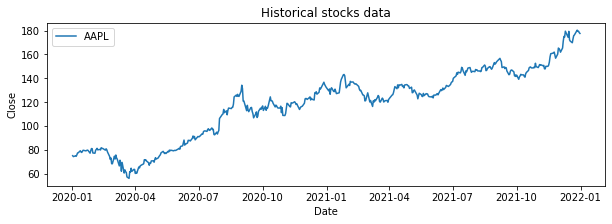

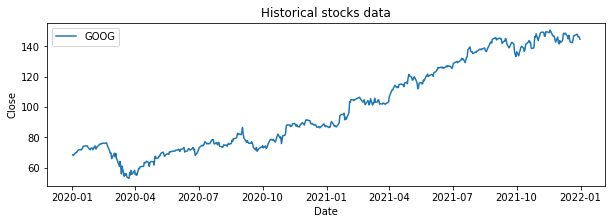

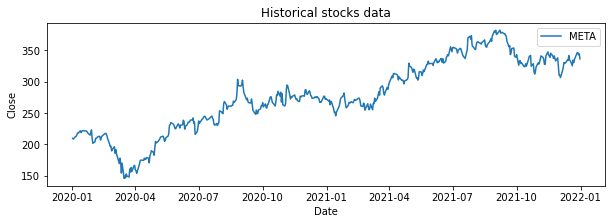

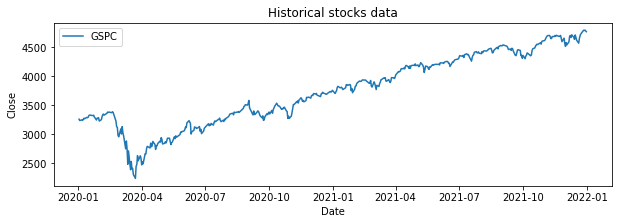

In [30]:
for stock in stock_data.columns:
    plt.figure(figsize=(10, 3))
    plt.plot(stock_data.index, stock_data[stock], label=stock)
    plt.title('Historical stocks data')
    plt.xlabel('Date')
    plt.ylabel('Close')
    plt.legend()
    plt.show()

In [31]:
returns = pd.merge(returns, pd.DataFrame(risk_free, columns=['risk_free']), left_index=True, right_index=True)
returns

,AAPL,GOOG,META,GSPC,risk_free
2020-01-03,-0.009722,-0.004907,-0.005291,-0.007060,0.002096
2020-01-06,0.007968,0.024657,0.018834,0.003533,0.002110
2020-01-07,-0.004703,-0.000624,0.002164,-0.002803,0.002110
2020-01-08,0.016086,0.007880,0.010138,0.004902,0.002164
2020-01-09,0.021241,0.011044,0.014311,0.006655,0.002164
...,...,...,...,...,...
2021-12-27,0.022975,0.006263,0.032633,0.013839,0.001041
2021-12-28,-0.005767,-0.010914,0.000116,-0.001010,0.001014
2021-12-29,0.000502,0.000386,-0.009474,0.001402,0.001027
2021-12-30,-0.006578,-0.003427,0.004141,-0.002990,0.001000


In [32]:
stocks = returns.drop(columns=['risk_free'])
stocks = stocks.columns
stocks

Index(['AAPL', 'GOOG', 'META', 'GSPC'], dtype='object')

In [33]:
for i in stocks:
    returns[f'excess_return_{i}'] = returns[i] - risk_free
returns

,AAPL,GOOG,META,GSPC,risk_free,excess_return_AAPL,excess_return_GOOG,excess_return_META,excess_return_GSPC
2020-01-03,-0.009722,-0.004907,-0.005291,-0.007060,0.002096,-0.011818,-0.007003,-0.007387,-0.009156
2020-01-06,0.007968,0.024657,0.018834,0.003533,0.002110,0.005859,0.022548,0.016724,0.001424
2020-01-07,-0.004703,-0.000624,0.002164,-0.002803,0.002110,-0.006813,-0.002734,0.000054,-0.004913
2020-01-08,0.016086,0.007880,0.010138,0.004902,0.002164,0.013922,0.005716,0.007974,0.002738
2020-01-09,0.021241,0.011044,0.014311,0.006655,0.002164,0.019076,0.008880,0.012147,0.004491
...,...,...,...,...,...,...,...,...,...
2021-12-27,0.022975,0.006263,0.032633,0.013839,0.001041,0.021934,0.005221,0.031592,0.012798
2021-12-28,-0.005767,-0.010914,0.000116,-0.001010,0.001014,-0.006781,-0.011928,-0.000898,-0.002024
2021-12-29,0.000502,0.000386,-0.009474,0.001402,0.001027,-0.000525,-0.000642,-0.010501,0.000374
2021-12-30,-0.006578,-0.003427,0.004141,-0.002990,0.001000,-0.007578,-0.004427,0.003141,-0.003990


In [34]:
returns.isnull().sum()

AAPL                  0
GOOG                  0
META                  0
GSPC                  0
risk_free             0
excess_return_AAPL    0
excess_return_GOOG    0
excess_return_META    0
excess_return_GSPC    0
dtype: int64

In [35]:
X = returns['excess_return_GSPC']
X = sm.add_constant(X, prepend=False)

C:\Users\snigdha.chigurupati\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [36]:
y_AAPL = returns['excess_return_AAPL']
capm_model_AAPL = sm.OLS(y_AAPL, X)
capm_AAPL = capm_model_AAPL.fit()
capm_AAPL.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     excess_return_AAPL   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     878.4
Date:                Wed, 05 Apr 2023   Prob (F-statistic):          5.15e-112
Time:                        10:45:13   Log-Likelihood:                 1420.2
No. Observations:                 500   AIC:                            -2836.
Df Residuals:                     498   BIC:                            -2828.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
excess_return_GSPC     1.1394      0.038     29.638      0.000       1.064       1.215
const                  0.0009      0.001      1.416      0.157      -0.000       0.002
==============================================================================
Omnibus:                       93.329   Durbin-Watson:                   1.868
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              539.028
Skew:                           0.660   Prob(JB):                    8.94e-118
Kurtosis:                       7.912   Cond. No.                         60.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
y_META = returns['excess_return_META']
capm_model_META = sm.OLS(y_META, X)
capm_META = capm_model_META.fit()
capm_META.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     excess_return_META   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     464.7
Date:                Wed, 05 Apr 2023   Prob (F-statistic):           2.68e-73
Time:                        10:45:13   Log-Likelihood:                 1313.5
No. Observations:                 500   AIC:                            -2623.
Df Residuals:                     498   BIC:                            -2615.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
excess_return_GSPC     1.0258      0.048     21.557      0.000       0.932       1.119
const                  0.0003      0.001      0.359      0.720      -0.001       0.002
==============================================================================
Omnibus:                       44.131   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.803
Skew:                           0.331   Prob(JB):                     1.79e-33
Kurtosis:                       5.608   Cond. No.                         60.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
y_GOOG = returns['excess_return_GOOG']
capm_model_GOOG = sm.OLS(y_GOOG, X)
capm_GOOG = capm_model_GOOG.fit()
capm_GOOG.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     excess_return_GOOG   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     921.8
Date:                Wed, 05 Apr 2023   Prob (F-statistic):          2.24e-115
Time:                        10:45:13   Log-Likelihood:                 1506.4
No. Observations:                 500   AIC:                            -3009.
Df Residuals:                     498   BIC:                            -3000.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
excess_return_GSPC     0.9823      0.032     30.362      0.000       0.919       1.046
const                  0.0008      0.001      1.460      0.145      -0.000       0.002
==============================================================================
Omnibus:                      111.206   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              662.368
Skew:                           0.816   Prob(JB):                    1.47e-144
Kurtosis:                       8.397   Cond. No.                         60.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
rf = risk_free.mean()
beta_coeff = [capm_AAPL.params[0], capm_META.params[0], capm_GOOG.params[0]]

In [40]:
def sharpe(stock_return, risk_free):
    sharpe_ratios = {}
    for index, stock_return in enumerate(stock_return, start=0):
        sharpe_ratios[stock_return] = round((returns.iloc[:, index].mean() - rf) / np.std(returns.iloc[:,index]), 4)
    return sharpe_ratios

def treynor(stock_return, risk_free):
    treynor_ratios = {}
    for index, stock_return in enumerate(stock_return, start=0):
        treynor_ratios[stock_return] = round((returns.iloc[:, index].mean() - rf) / beta_coeff[index], 4)
    return treynor_ratios

In [41]:
sharpe(returns[['AAPL','META','GOOG']], rf)

{'AAPL': 0.0583, 'META': 0.0591, 'GOOG': 0.0291}

In [42]:
treynor(returns[['AAPL','META','GOOG']], rf)

{'AAPL': 0.0012, 'META': 0.0012, 'GOOG': 0.0007}

After analyzing the CAPM model and sharpe and treynor ratios, the best stock amongst the three is META which is as riskier as the market yet giving a positive and little higher value returns when compared to other stocks considered

### Telecommunications

In [43]:
stocks = ['TMUS', 'VZ','T','^GSPC']
start = dt.datetime(2020,1,1)
end = dt.datetime(2022,1,1)
stock_data = yf.download(stocks, start= start, end=end, interval='1d', ignore_tz= True)['Close']

[*********************100%***********************]  4 of 4 completed


In [44]:
stock_data.head()

,T,TMUS,VZ,^GSPC
Date,,,,
2020-01-02,29.350452,78.589996,61.049999,3257.850098
2020-01-03,29.501511,78.169998,60.400002,3234.850098
2020-01-06,29.531721,78.620003,60.270000,3246.280029
2020-01-07,29.645016,78.919998,59.599998,3237.179932
2020-01-08,29.735649,79.419998,59.709999,3253.050049


In [45]:
stock_data.rename(columns= {"^GSPC":"GSPC"}, inplace= True)
stock_data.head()

,T,TMUS,VZ,GSPC
Date,,,,
2020-01-02,29.350452,78.589996,61.049999,3257.850098
2020-01-03,29.501511,78.169998,60.400002,3234.850098
2020-01-06,29.531721,78.620003,60.270000,3246.280029
2020-01-07,29.645016,78.919998,59.599998,3237.179932
2020-01-08,29.735649,79.419998,59.709999,3253.050049


In [46]:
returns = stock_data.pct_change().dropna()
returns

,T,TMUS,VZ,GSPC
Date,,,,
2020-01-03,0.005147,-0.005344,-0.010647,-0.007060
2020-01-06,0.001024,0.005757,-0.002152,0.003533
2020-01-07,0.003836,0.003816,-0.011117,-0.002803
2020-01-08,0.003057,0.006336,0.001846,0.004902
2020-01-09,-0.014478,0.004911,-0.014403,0.006655
...,...,...,...,...
2021-12-27,-0.003619,-0.011092,0.000000,0.013839
2021-12-28,0.001614,-0.003542,0.000759,-0.001010
2021-12-29,-0.007252,-0.004401,-0.006829,0.001402


In [47]:
returns.corr()

,T,TMUS,VZ,GSPC
T,1.000000,0.462264,0.744853,0.689978
TMUS,0.462264,1.000000,0.466450,0.658026
VZ,0.744853,0.466450,1.000000,0.625062
GSPC,0.689978,0.658026,0.625062,1.000000


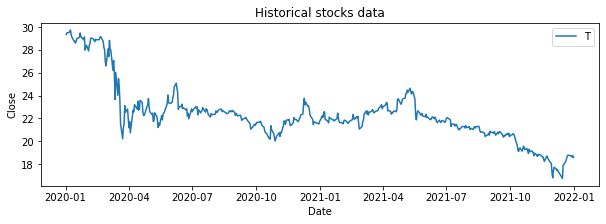

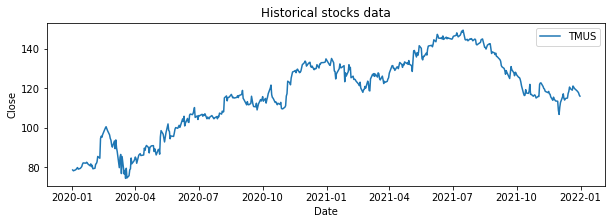

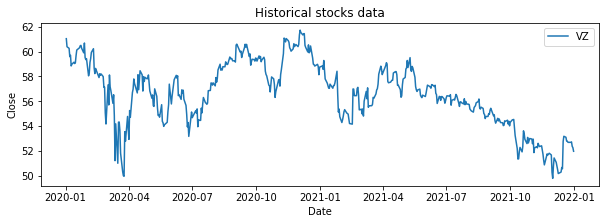

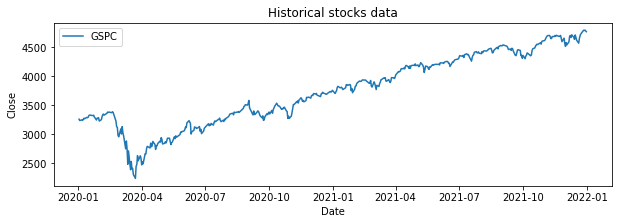

In [48]:
for stock in stock_data.columns:
    plt.figure(figsize=(10, 3))
    plt.plot(stock_data.index, stock_data[stock], label=stock)
    plt.title('Historical stocks data')
    plt.xlabel('Date')
    plt.ylabel('Close')
    plt.legend()
    plt.show()

In [49]:
returns = pd.merge(returns, pd.DataFrame(risk_free, columns=['risk_free']), left_index=True, right_index=True)
returns

,T,TMUS,VZ,GSPC,risk_free
2020-01-03,0.005147,-0.005344,-0.010647,-0.007060,0.002096
2020-01-06,0.001024,0.005757,-0.002152,0.003533,0.002110
2020-01-07,0.003836,0.003816,-0.011117,-0.002803,0.002110
2020-01-08,0.003057,0.006336,0.001846,0.004902,0.002164
2020-01-09,-0.014478,0.004911,-0.014403,0.006655,0.002164
...,...,...,...,...,...
2021-12-27,-0.003619,-0.011092,0.000000,0.013839,0.001041
2021-12-28,0.001614,-0.003542,0.000759,-0.001010,0.001014
2021-12-29,-0.007252,-0.004401,-0.006829,0.001402,0.001027
2021-12-30,0.005682,-0.009606,-0.002101,-0.002990,0.001000


In [50]:
stocks = returns.drop(columns=['risk_free'])
stocks = stocks.columns
stocks

Index(['T', 'TMUS', 'VZ', 'GSPC'], dtype='object')

In [51]:
for i in stocks:
    returns[f'excess_return_{i}'] = returns[i] - risk_free
returns

,T,TMUS,VZ,GSPC,risk_free,excess_return_T,excess_return_TMUS,excess_return_VZ,excess_return_GSPC
2020-01-03,0.005147,-0.005344,-0.010647,-0.007060,0.002096,0.003051,-0.007440,-0.012743,-0.009156
2020-01-06,0.001024,0.005757,-0.002152,0.003533,0.002110,-0.001086,0.003647,-0.004262,0.001424
2020-01-07,0.003836,0.003816,-0.011117,-0.002803,0.002110,0.001727,0.001706,-0.013226,-0.004913
2020-01-08,0.003057,0.006336,0.001846,0.004902,0.002164,0.000893,0.004171,-0.000319,0.002738
2020-01-09,-0.014478,0.004911,-0.014403,0.006655,0.002164,-0.016642,0.002746,-0.016567,0.004491
...,...,...,...,...,...,...,...,...,...
2021-12-27,-0.003619,-0.011092,0.000000,0.013839,0.001041,-0.004660,-0.012133,-0.001041,0.012798
2021-12-28,0.001614,-0.003542,0.000759,-0.001010,0.001014,0.000601,-0.004556,-0.000254,-0.002024
2021-12-29,-0.007252,-0.004401,-0.006829,0.001402,0.001027,-0.008280,-0.005428,-0.007856,0.000374
2021-12-30,0.005682,-0.009606,-0.002101,-0.002990,0.001000,0.004682,-0.010606,-0.003101,-0.003990


In [52]:
returns.isnull().sum()

T                     0
TMUS                  0
VZ                    0
GSPC                  0
risk_free             0
excess_return_T       0
excess_return_TMUS    0
excess_return_VZ      0
excess_return_GSPC    0
dtype: int64

In [53]:
X = returns['excess_return_GSPC']
X = sm.add_constant(X, prepend=False)

C:\Users\snigdha.chigurupati\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [54]:
y_TMUS = returns['excess_return_TMUS']
capm_model_TMUS = sm.OLS(y_TMUS, X)
capm_TMUS = capm_model_TMUS.fit()
capm_TMUS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     excess_return_TMUS   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     379.8
Date:                Wed, 05 Apr 2023   Prob (F-statistic):           2.72e-63
Time:                        10:45:14   Log-Likelihood:                 1363.4
No. Observations:                 500   AIC:                            -2723.
Df Residuals:                     498   BIC:                            -2714.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
excess_return_GSPC     0.8393      0.043     19.489      0.000       0.755       0.924
const                  0.0002      0.001      0.262      0.793      -0.001       0.002
==============================================================================
Omnibus:                      215.870   Durbin-Watson:                   2.164
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1878.215
Skew:                           1.651   Prob(JB):                         0.00
Kurtosis:                      11.902   Cond. No.                         60.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
y_VZ = returns['excess_return_VZ']
capm_model_VZ = sm.OLS(y_VZ, X)
capm_VZ = capm_model_VZ.fit()
capm_VZ.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       excess_return_VZ   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     322.3
Date:                Wed, 05 Apr 2023   Prob (F-statistic):           6.06e-56
Time:                        10:45:14   Log-Likelihood:                 1594.2
No. Observations:                 500   AIC:                            -3184.
Df Residuals:                     498   BIC:                            -3176.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
excess_return_GSPC     0.4874      0.027     17.953      0.000       0.434       0.541
const                 -0.0008      0.000     -1.895      0.059      -0.002    3.11e-05
==============================================================================
Omnibus:                       85.067   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              557.871
Skew:                           0.535   Prob(JB):                    7.24e-122
Kurtosis:                       8.063   Cond. No.                         60.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
y_T = returns['excess_return_T']
capm_model_T = sm.OLS(y_T, X)
capm_T = capm_model_T.fit()
capm_T.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        excess_return_T   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     458.8
Date:                Wed, 05 Apr 2023   Prob (F-statistic):           1.24e-72
Time:                        10:45:14   Log-Likelihood:                 1456.5
No. Observations:                 500   AIC:                            -2909.
Df Residuals:                     498   BIC:                            -2900.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
excess_return_GSPC     0.7659      0.036     21.420      0.000       0.696       0.836
const                 -0.0014      0.001     -2.432      0.015      -0.003      -0.000
==============================================================================
Omnibus:                       62.746   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              383.187
Skew:                           0.307   Prob(JB):                     6.20e-84
Kurtosis:                       7.245   Cond. No.                         60.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
rf = risk_free.mean()
beta_coeff = [capm_TMUS.params[0], capm_VZ.params[0], capm_T.params[0]]

In [58]:
def sharpe(stock_return, risk_free):
    sharpe_ratios = {}
    for index, stock_return in enumerate(stock_return, start=0):
        sharpe_ratios[stock_return] = round((returns.iloc[:, index].mean() - rf) / np.std(returns.iloc[:,index]), 4)
    return sharpe_ratios

def treynor(stock_return, risk_free):
    treynor_ratios = {}
    for index, stock_return in enumerate(stock_return, start=0):
        treynor_ratios[stock_return] = round((returns.iloc[:, index].mean() - rf) / beta_coeff[index], 4)
    return treynor_ratios

In [59]:
sharpe(returns[['TMUS','VZ','T']], rf)

{'TMUS': -0.0613, 'VZ': 0.0254, 'T': -0.0506}

In [60]:
treynor(returns[['TMUS','VZ','T']], rf)

{'TMUS': -0.0013, 'VZ': 0.0011, 'T': -0.0008}

After analyzing the CAPM model and sharpe and treynor ratios, the best stock is Verizon(VZ) which has the risk lesser than market and giving better value returns than the other stocks

### Banking sector

In [61]:
stocks = ['JPM', 'STT','WFC','^GSPC']
start = dt.datetime(2020,1,1)
end = dt.datetime(2022,1,1)
stock_data = yf.download(stocks, start= start, end=end, interval='1d', ignore_tz= True)['Close']

[*********************100%***********************]  4 of 4 completed


In [62]:
stock_data.head()

,JPM,STT,WFC,^GSPC
Date,,,,
2020-01-02,141.089996,80.760002,53.750000,3257.850098
2020-01-03,138.339996,79.570000,53.419998,3234.850098
2020-01-06,138.229996,80.790001,53.099998,3246.280029
2020-01-07,135.880005,81.910004,52.660000,3237.179932
2020-01-08,136.940002,81.489998,52.820000,3253.050049


In [63]:
stock_data.rename(columns= {"^GSPC":"GSPC"}, inplace= True)
stock_data.head()

,JPM,STT,WFC,GSPC
Date,,,,
2020-01-02,141.089996,80.760002,53.750000,3257.850098
2020-01-03,138.339996,79.570000,53.419998,3234.850098
2020-01-06,138.229996,80.790001,53.099998,3246.280029
2020-01-07,135.880005,81.910004,52.660000,3237.179932
2020-01-08,136.940002,81.489998,52.820000,3253.050049


In [64]:
returns = stock_data.pct_change().dropna()
returns

,JPM,STT,WFC,GSPC
Date,,,,
2020-01-03,-0.019491,-0.014735,-0.006140,-0.007060
2020-01-06,-0.000795,0.015332,-0.005990,0.003533
2020-01-07,-0.017001,0.013863,-0.008286,-0.002803
2020-01-08,0.007801,-0.005128,0.003038,0.004902
2020-01-09,0.003651,0.017548,-0.001704,0.006655
...,...,...,...,...
2021-12-27,0.005723,0.008169,0.008478,0.013839
2021-12-28,0.003035,-0.000960,-0.007177,-0.001010
2021-12-29,-0.000504,0.000961,0.000620,0.001402


In [65]:
returns.corr()

,JPM,STT,WFC,GSPC
JPM,1.000000,0.843414,0.855876,0.770865
STT,0.843414,1.000000,0.765135,0.735622
WFC,0.855876,0.765135,1.000000,0.704741
GSPC,0.770865,0.735622,0.704741,1.000000


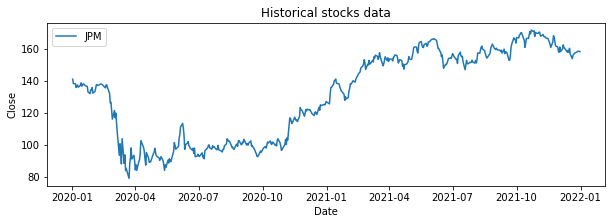

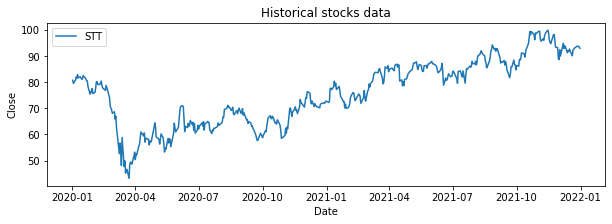

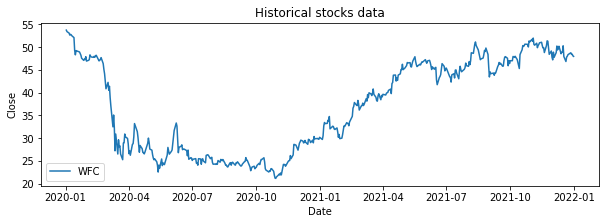

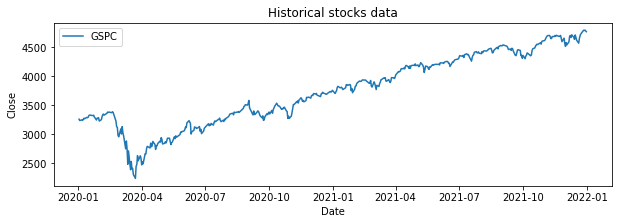

In [66]:
for stock in stock_data.columns:
    plt.figure(figsize=(10, 3))
    plt.plot(stock_data.index, stock_data[stock], label=stock)
    plt.title('Historical stocks data')
    plt.xlabel('Date')
    plt.ylabel('Close')
    plt.legend()
    plt.show()

In [67]:
returns = pd.merge(returns, pd.DataFrame(risk_free, columns=['risk_free']), left_index=True, right_index=True)
returns

,JPM,STT,WFC,GSPC,risk_free
2020-01-03,-0.019491,-0.014735,-0.006140,-0.007060,0.002096
2020-01-06,-0.000795,0.015332,-0.005990,0.003533,0.002110
2020-01-07,-0.017001,0.013863,-0.008286,-0.002803,0.002110
2020-01-08,0.007801,-0.005128,0.003038,0.004902,0.002164
2020-01-09,0.003651,0.017548,-0.001704,0.006655,0.002164
...,...,...,...,...,...
2021-12-27,0.005723,0.008169,0.008478,0.013839,0.001041
2021-12-28,0.003035,-0.000960,-0.007177,-0.001010,0.001014
2021-12-29,-0.000504,0.000961,0.000620,0.001402,0.001027
2021-12-30,-0.000505,-0.005864,-0.007224,-0.002990,0.001000


In [68]:
stocks = returns.drop(columns=['risk_free'])
stocks = stocks.columns
stocks

Index(['JPM', 'STT', 'WFC', 'GSPC'], dtype='object')

In [69]:
for i in stocks:
    returns[f'excess_return_{i}'] = returns[i] - risk_free
returns

,JPM,STT,WFC,GSPC,risk_free,excess_return_JPM,excess_return_STT,excess_return_WFC,excess_return_GSPC
2020-01-03,-0.019491,-0.014735,-0.006140,-0.007060,0.002096,-0.021587,-0.016831,-0.008235,-0.009156
2020-01-06,-0.000795,0.015332,-0.005990,0.003533,0.002110,-0.002905,0.013223,-0.008100,0.001424
2020-01-07,-0.017001,0.013863,-0.008286,-0.002803,0.002110,-0.019110,0.011754,-0.010396,-0.004913
2020-01-08,0.007801,-0.005128,0.003038,0.004902,0.002164,0.005637,-0.007292,0.000874,0.002738
2020-01-09,0.003651,0.017548,-0.001704,0.006655,0.002164,0.001487,0.015384,-0.003868,0.004491
...,...,...,...,...,...,...,...,...,...
2021-12-27,0.005723,0.008169,0.008478,0.013839,0.001041,0.004682,0.007128,0.007437,0.012798
2021-12-28,0.003035,-0.000960,-0.007177,-0.001010,0.001014,0.002021,-0.001973,-0.008190,-0.002024
2021-12-29,-0.000504,0.000961,0.000620,0.001402,0.001027,-0.001532,-0.000067,-0.000408,0.000374
2021-12-30,-0.000505,-0.005864,-0.007224,-0.002990,0.001000,-0.001505,-0.006864,-0.008224,-0.003990


In [70]:
returns.isnull().sum()

JPM                   0
STT                   0
WFC                   0
GSPC                  0
risk_free             0
excess_return_JPM     0
excess_return_STT     0
excess_return_WFC     0
excess_return_GSPC    0
dtype: int64

In [71]:
X = returns['excess_return_GSPC']
X = sm.add_constant(X, prepend=False)

C:\Users\snigdha.chigurupati\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [72]:
y_JPM = returns['excess_return_JPM']
capm_model_JPM = sm.OLS(y_JPM, X)
capm_JPM = capm_model_JPM.fit()
capm_JPM.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      excess_return_JPM   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     736.6
Date:                Wed, 05 Apr 2023   Prob (F-statistic):          3.04e-100
Time:                        10:45:15   Log-Likelihood:                 1339.9
No. Observations:                 500   AIC:                            -2676.
Df Residuals:                     498   BIC:                            -2667.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
excess_return_GSPC     1.2250      0.045     27.141      0.000       1.136       1.314
const                 -0.0003      0.001     -0.454      0.650      -0.002       0.001
==============================================================================
Omnibus:                      151.881   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1179.849
Skew:                           1.096   Prob(JB):                    6.30e-257
Kurtosis:                      10.199   Cond. No.                         60.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
y_STT = returns['excess_return_STT']
capm_model_STT = sm.OLS(y_STT, X)
capm_STT = capm_model_STT.fit()
capm_STT.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      excess_return_STT   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     594.5
Date:                Wed, 05 Apr 2023   Prob (F-statistic):           5.30e-87
Time:                        10:45:15   Log-Likelihood:                 1247.3
No. Observations:                 500   AIC:                            -2491.
Df Residuals:                     498   BIC:                            -2482.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
excess_return_GSPC     1.3246      0.054     24.383      0.000       1.218       1.431
const                 -0.0003      0.001     -0.303      0.762      -0.002       0.001
==============================================================================
Omnibus:                       71.158   Durbin-Watson:                   2.126
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              360.124
Skew:                           0.487   Prob(JB):                     6.31e-79
Kurtosis:                       7.042   Cond. No.                         60.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
y_WFC = returns['excess_return_WFC']
capm_model_WFC = sm.OLS(y_WFC, X)
capm_WFC = capm_model_WFC.fit()
capm_WFC.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      excess_return_WFC   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     493.9
Date:                Wed, 05 Apr 2023   Prob (F-statistic):           1.55e-76
Time:                        10:45:15   Log-Likelihood:                 1194.9
No. Observations:                 500   AIC:                            -2386.
Df Residuals:                     498   BIC:                            -2377.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
excess_return_GSPC     1.3407      0.060     22.224      0.000       1.222       1.459
const                 -0.0008      0.001     -0.755      0.451      -0.003       0.001
==============================================================================
Omnibus:                       24.246   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.811
Skew:                           0.172   Prob(JB):                     6.24e-14
Kurtosis:                       4.673   Cond. No.                         60.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
rf = risk_free.mean()
beta_coeff = [capm_JPM.params[0], capm_STT.params[0], capm_WFC.params[0]]

In [76]:
def sharpe(stock_return, risk_free):
    sharpe_ratios = {}
    for index, stock_return in enumerate(stock_return, start=0):
        sharpe_ratios[stock_return] = round((returns.iloc[:, index].mean() - rf) / np.std(returns.iloc[:,index]), 4)
    return sharpe_ratios

def treynor(stock_return, risk_free):
    treynor_ratios = {}
    for index, stock_return in enumerate(stock_return, start=0):
        treynor_ratios[stock_return] = round((returns.iloc[:, index].mean() - rf) / beta_coeff[index], 4)
    return treynor_ratios

In [77]:
sharpe(returns[['JPM','STT','WFC']], rf)

{'JPM': 0.0065, 'STT': 0.0094, 'WFC': -0.0062}

In [78]:
treynor(returns[['JPM','STT','WFC']], rf)

{'JPM': 0.0001, 'STT': 0.0002, 'WFC': -0.0001}

After analyzing the CAPM model and sharpe and treynor ratios, the best stock is State Street(STT) which has much more risk than market but it gives better value returns than the other stocks

### Combining the best stocks from each sector, Moderna, Meta, Verizon and State Street to build the best portfolio

In [79]:
from pypfopt.efficient_frontier import EfficientFrontier

In [80]:
stocks = ['MRNA', 'META','VZ','STT']
start = dt.datetime(2020,1,1)
end = dt.datetime(2022,1,1)
stock_data = yf.download(stocks, start= start, end=end, interval='1d', ignore_tz= True)['Close']
stock_data.head()

[*********************100%***********************]  4 of 4 completed


,META,MRNA,STT,VZ
Date,,,,
2020-01-02,209.779999,19.230000,80.760002,61.049999
2020-01-03,208.669998,18.889999,79.570000,60.400002
2020-01-06,212.600006,18.129999,80.790001,60.270000
2020-01-07,213.059998,17.780001,81.910004,59.599998
2020-01-08,215.220001,17.980000,81.489998,59.709999


In [81]:
returns = stock_data.pct_change().dropna()
returns

,META,MRNA,STT,VZ
Date,,,,
2020-01-03,-0.005291,-0.017681,-0.014735,-0.010647
2020-01-06,0.018834,-0.040233,0.015332,-0.002152
2020-01-07,0.002164,-0.019305,0.013863,-0.011117
2020-01-08,0.010138,0.011249,-0.005128,0.001846
2020-01-09,0.014311,0.023359,0.017548,-0.014403
...,...,...,...,...
2021-12-27,0.032633,-0.012440,0.008169,0.000000
2021-12-28,0.000116,-0.022035,-0.000960,0.000759
2021-12-29,-0.009474,0.026673,0.000961,-0.006829


In [82]:
returns.corr()

,META,MRNA,STT,VZ
META,1.000000,0.013797,0.401674,0.331815
MRNA,0.013797,1.000000,-0.113704,0.083452
STT,0.401674,-0.113704,1.000000,0.492193
VZ,0.331815,0.083452,0.492193,1.000000


In [83]:
risk_free_avg = risk_free.agg('mean')
risk_free_avg

0.0004480161545598428

In [84]:
# Defining the annual expected returns and annual covariance matrix of your portfolio
mu = returns.mean() * 252
S = returns.cov() * np.sqrt(252)

In [85]:
ef_portfolio = EfficientFrontier(mu, S)

In [86]:
weights = ef_portfolio.max_sharpe()
weights

OrderedDict([('META', 0.3656318689127886),
             ('MRNA', 0.478242169345088),
             ('STT', 0.1561259617421234),
             ('VZ', 0.0)])

Moderna has the highest weightage in the portofio when considering the max sharpe ratio

In [87]:
# Calculate the expected return, volatility, and Sharpe Ratio of the portfolio with risk free rate = 0.01
expected_return, volatility, sharpe_ratio = ef_portfolio.portfolio_performance(risk_free_rate=risk_free_avg)
print(f"Expected return: {expected_return}")
print(f"Expected Volatality: {volatility}")
print(f"Sharpe ratio: {sharpe_ratio}")

Expected return: 0.9562798861359493
Expected Volatality: 0.11756301800968558
Sharpe ratio: 7.9640681396832855


C:\Users\snigdha.chigurupati\anaconda3\lib\site-packages\pypfopt\efficient_frontier\efficient_frontier.py:444: UserWarning: The risk_free_rate provided to portfolio_performance is different to the one used by max_sharpe. Using the previous value.
  warnings.warn(


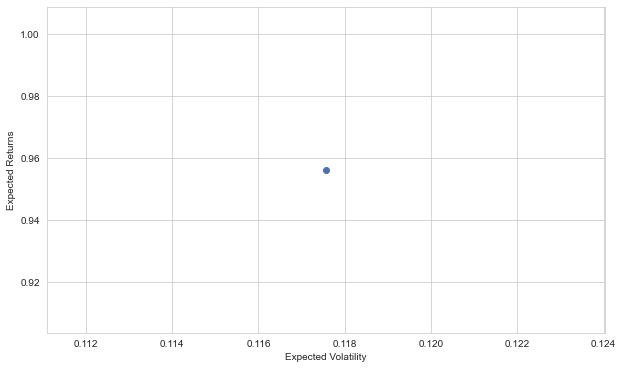

In [88]:
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
plt.scatter(volatility, expected_return, marker='o')
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Returns')
plt.show()

The Expected volatality is 0.118 and the Expected returns on the portfolio is 0.96. The linearity in the plot tells that the as risk is increasing, so is the expected return.